In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('superstore_final_dataset.csv')

In [3]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [6]:
# Drop Duplicates
df.drop_duplicates(subset=df.drop('Row_ID', axis=1).columns, inplace=True)

In [7]:
df.shape

(9799, 18)

In [8]:
#checking null values
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [9]:
# Dropping null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

In [12]:
df.shape

(9788, 18)

In [13]:
df['Ship_Date']

0       11/11/2017
1       11/11/2017
2       16/06/2017
3       18/10/2016
4       18/10/2016
           ...    
9795    28/05/2017
9796    17/01/2016
9797    17/01/2016
9798    17/01/2016
9799    17/01/2016
Name: Ship_Date, Length: 9788, dtype: string

In [14]:
# ship date value in correct date format
df['Ship_Date']=pd.to_datetime(df['Ship_Date'])

C:\Users\Priyanka Sharma\AppData\Local\Temp\ipykernel_13204\751902736.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship_Date']=pd.to_datetime(df['Ship_Date'])


In [15]:
df['Ship_Date'].head()

0   2017-11-11
1   2017-11-11
2   2017-06-16
3   2016-10-18
4   2016-10-18
Name: Ship_Date, dtype: datetime64[ns]

In [16]:
#order date in correct date format
df['Order_Date']=pd.to_datetime(df['Order_Date'])

C:\Users\Priyanka Sharma\AppData\Local\Temp\ipykernel_13204\1882151666.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [17]:
df['Order_Date'].head()

0   2017-08-11
1   2017-08-11
2   2017-12-06
3   2016-11-10
4   2016-11-10
Name: Order_Date, dtype: datetime64[ns]

In [18]:
# For each entry in dataset ship date >= order date
df= df[(df['Ship_Date'] >= df['Order_Date'])]

In [19]:
df.shape

(8104, 18)

In [20]:
df.describe()

,Row_ID,Postal_Code,Sales
count,8104.000000,8104.000000,8104.000000
mean,4911.564659,55436.663746,234.150872
std,2805.089560,31937.147511,661.643335
min,1.000000,1040.000000,0.444000
25%,2508.750000,23434.000000,17.220000
50%,4906.500000,59601.000000,54.432000
75%,7308.250000,90005.000000,210.995000
max,9796.000000,99301.000000,22638.480000


In [20]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x2d91928ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x2d91928cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d91927c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d9192aa520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d9192aa7c0>],
 'means': []}

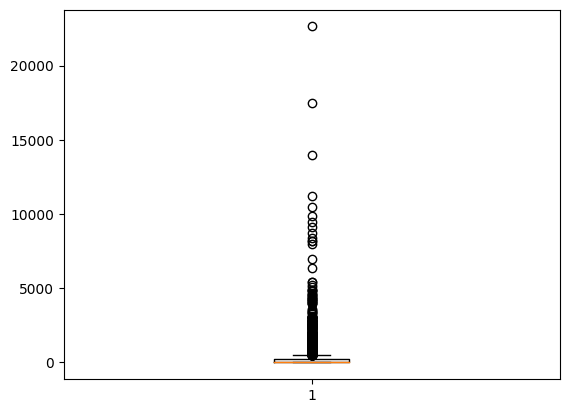

In [21]:
plt.boxplot(df['Sales'])

In [21]:
df.dtypes

Row_ID                    Int64
Order_ID                 string
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                string
Customer_ID              string
Customer_Name            string
Segment                  string
Country                  string
City                     string
State                    string
Postal_Code               Int64
Region                   string
Product_ID               string
Category                 string
Sub_Category             string
Product_Name             string
Sales                   Float64
dtype: object